<a href="https://colab.research.google.com/github/sunghwa0508/sunghwa_project/blob/main/anomaly_dectection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection project 이상 탐지 프로젝트





**<목적>** 고객의 신용카드 내역을 분석하여 사기 거래를 예측할 수 있는 모델을 만들고자합니다. 





**<사용 데이터> Credit Card Fraud Detection**

'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'





데이터 셋 설명:

- 2013년 9월 유럽 카드 보유자들이 신용카드로 한 284,807개의 거래 내역

- Class 0: 정상 거래, Class 1: 비정상 거래

- V1~V28 : 고객 개인정보로 V99로 표기







**<분석 방법>**

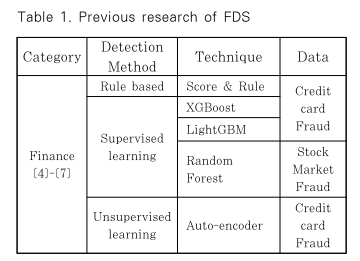

해당 데이터 셋은 Class의 값이 0과 1로 사전에 감독된 Supervised learing자료 이므로 XGBoost를 사용하여 분석하였습니다.


**Supervised Anomaly Detection**

- 해당 데이터 셋은 Class의 값이 0과 1로 사전에 감독된 Supervised learing자료 이므로 XGBoost를 사용하여 분석하였습니다.

- Supervised Learning 방식은 다른 방법 대비 정확도가 높은 특징이 있습니다. 그래서 높은 정확도를 요구로 하는 경우에 주로 사용되며, 비정상 sample을 다양하게 보유할수록 더 높은 성능을 달성할 수 있습니다.



**XGBoost(Extreme Gradient Boosting)란?**

- Boosting : 여러 개의 약한 Decision Tree를 조합해서 사용하는 Ensemble 기법 중 하나입니다.
즉, 약한 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여
강한 예측모형을 만듭니다

- XGBoost: Boosting 기법을 이용하여 구현한 Gradient Boost 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리입니다.



**<References**

(2022)Why Should I Ban You! : X-FDS (Explainable FDS) Model Based onOnlineGame Payment Log

'https://www.koreascience.or.kr/article/JAKO202209537216841.pdf'


---



In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import decomposition

from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
data = pd.read_csv('/content/drive/My Drive/code/creditcard.csv', encoding='cp949')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#데이터탐색 (EDA) 및 전처리

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
#중복특성 확인
data.T.duplicated()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

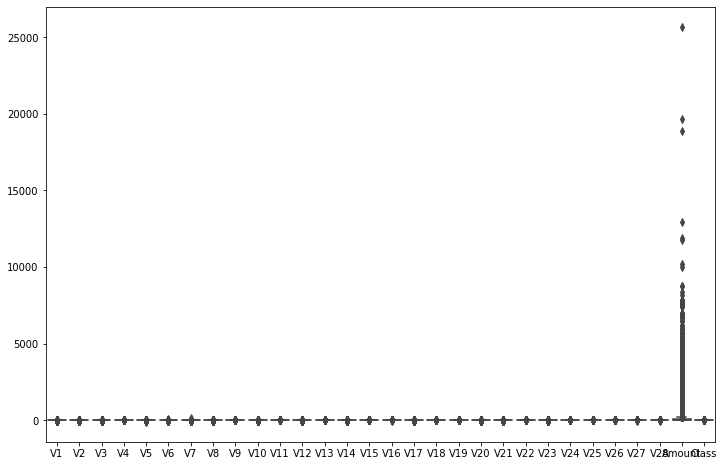

In [41]:
#아웃라이어 확인

import matplotlib.pyplot as plt 
import seaborn as sns  

data_time_drop  = data.drop(['Time'], axis=1)
plt. figure(figsize=(12,8))
sns.boxplot(data=data_time_drop)
plt.show()

## 데이터 관계

In [67]:
# Change to binary
data['Class'] = data['Class'].astype('category')
data['Class'] = data['Class'].cat.codes

In [70]:
# Class(Fraud) 데이터 범주의 비율을 확인합니다.

target = 'Class'
data_target = data[target]
print(data_target.value_counts())
print(data_target.value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fraud Distributions')

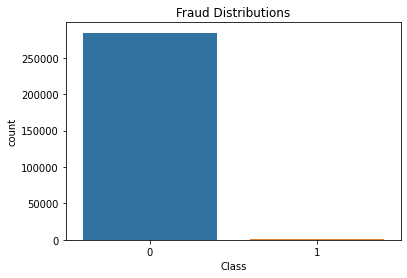

In [72]:
sns.countplot('Class', data=data)
plt.title('Fraud Distributions')

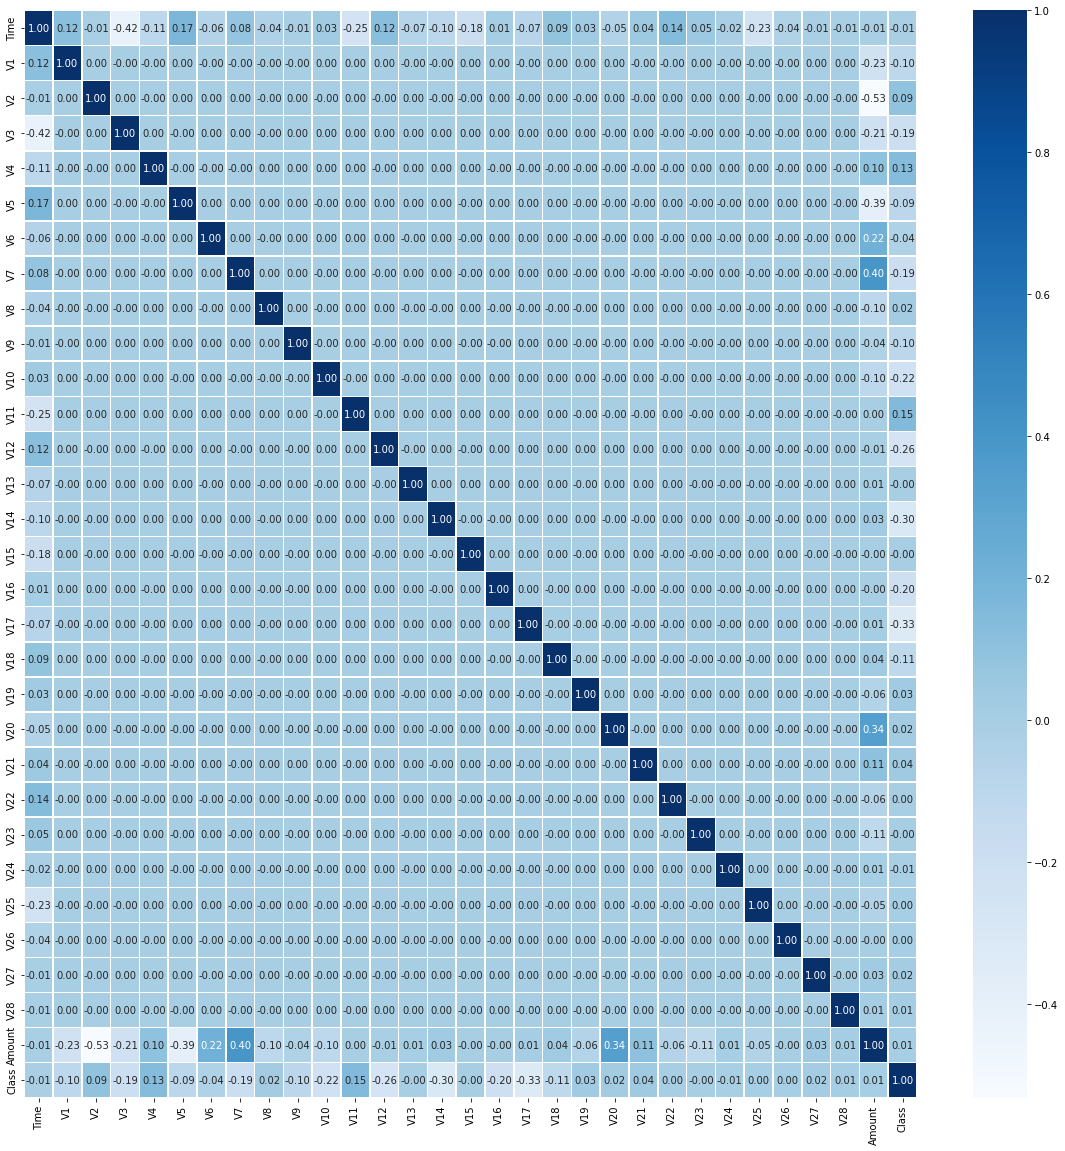

In [73]:
#전체 데이터 상관관계

import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(20,20))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

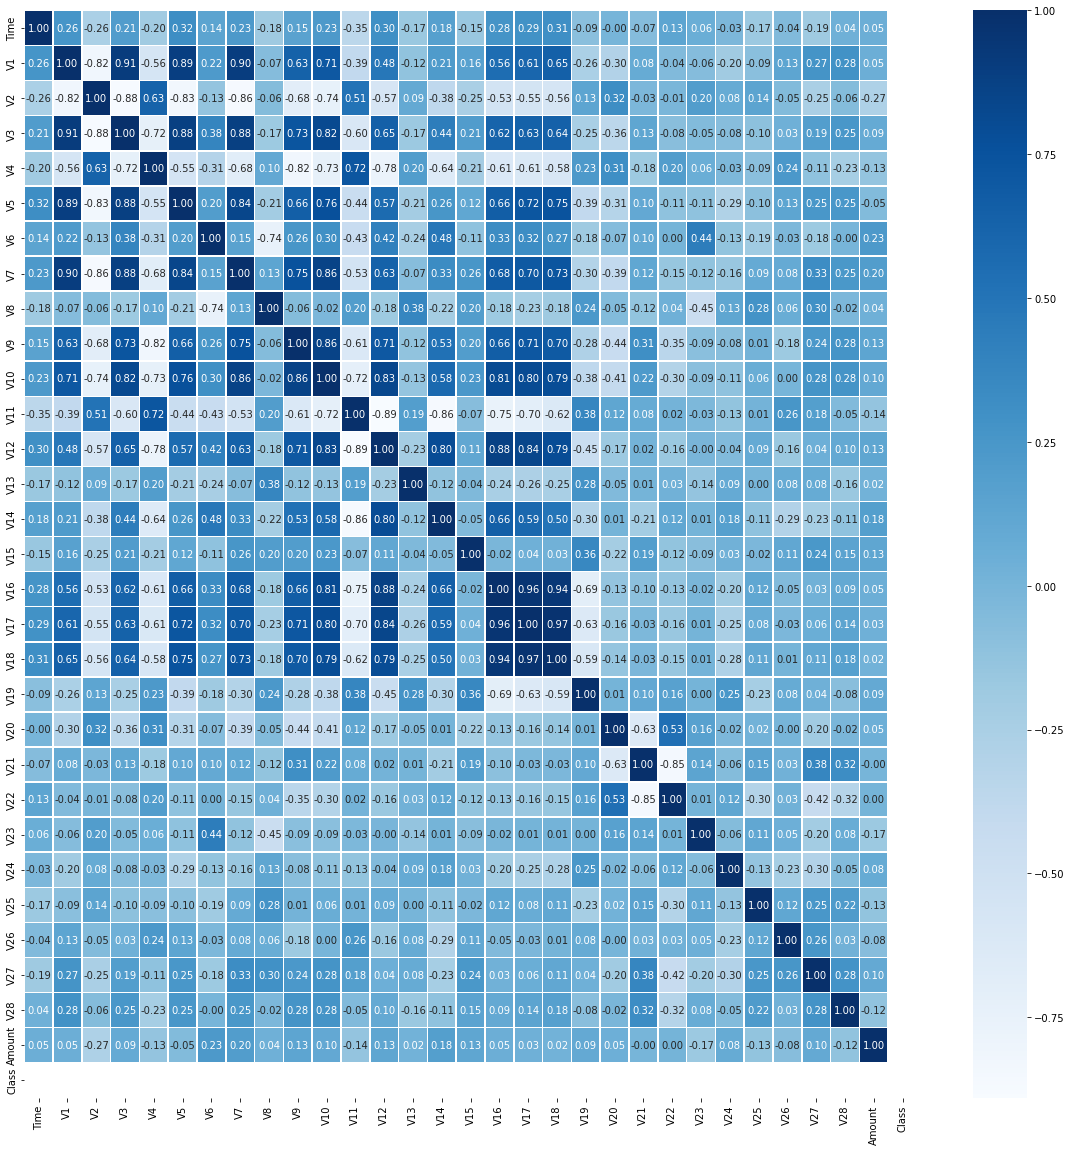

In [79]:
#Fraud 데이터 상관관계

Fraud = data.Class == 1
Fraud_data = data.loc[Fraud, :]

plt.figure(figsize=(20,20))
sns.heatmap(data = Fraud_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

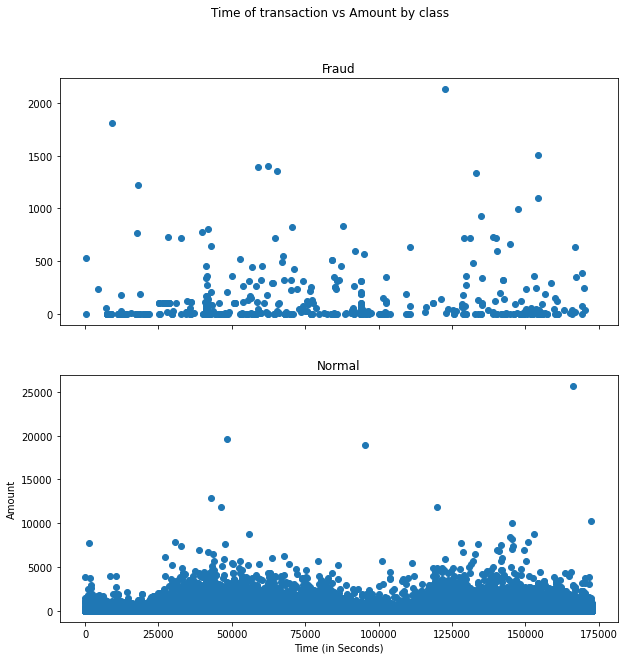

In [138]:
nomal = data.Class == 0
nomal_data = data.loc[nomal, :]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Fraud_data.Time, Fraud_data.Amount)
ax1.set_title('Fraud')

ax2.scatter(nomal_data.Time, nomal_data.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

- Anomaly Detection이 적용되는 일반적인 산업 현장에서는 정상 sample보다 비정상 sample의 발생 빈도가 현저히 적기 때문에 Class-Imbalance(불균형) 문제를 자주 겪게 됩니다. 지금의 데이터도 정상 거래 284315건, 비정상 거래 492건으로 데이터 불균형이 존재합니다.

- 데이터 불균형문제를 해결하기 위해 'RobustScaler'를 사용하여 표준정규화 하였습니다.

- 'RobustScaler'는 특성들이 같은 스케일을 갖게 되지만 평균대신 중앙값을 사용하여 극단값에 영향을 받지 않습니다.

#모델 훈련

In [81]:
from sklearn.model_selection import train_test_split

train_data = data.drop(['Class'],axis=1)
target_data = data[['Class']]

#새로운 데이터가 얼마나 일반화되어 있는지 측정하기 위해 train : test set을 8:2로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, test_size =0.2, random_state=2 )


#검증데이터: 다시 train set을 8:2로 나눠 validation set을 만들어줍니다.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [82]:
len(X_train),len(y_train), len(X_valid), len(y_valid),  len(X_test), len(y_test)

(182276, 182276, 45569, 45569, 56962, 56962)

**XG Boost**

In [139]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

# ordinal encoding
model =  XGBClassifier()
pipe_XG = make_pipeline( 
    SimpleImputer(),
    RobustScaler(), 
    XGBClassifier(random_state=20, criterion='entropy', n_jobs=-1, max_depth=15, n_estimators=200)
)

pipe_XG.fit(X_train, y_train)
print('훈련 정확도: ', pipe_XG.score(X_train, y_train))
print('검증 정확도', pipe_XG.score(X_valid, y_valid))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 정확도:  1.0
검증 정확도 0.9995391603941276


##예측 수행

In [152]:
y_pred = pipe_XG.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

**아래 pipe_XG모델에 예측하고자 하는 데이터를 넣어 Fraud를 탐지 및 예측할 수 있습니다.**

- 새로만든 데이터 값은 Class값이 0으로 정상거래를 한 고객입니다. 예측값 역시 0으로 정상거래를 하였다는 예측 결과를 보입니다.



In [165]:
new_data = X_test.tail(1)
y_pred1 = pipe_XG.predict(new_data)
print(y_pred1, y_test.tail(1))

[0]         Class
166502      0


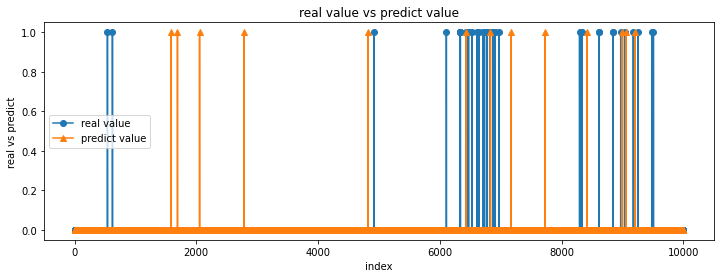

In [153]:
fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(data_target[:10000], marker='o', label='real value')
chart.plot(y_pred[:10000], marker='^', label='predict value')
chart.set_title('real value vs predict value')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 

#모델 평가

1. 분류 성능평가 지표

- 데이터가 불균형한 경우 정확도보다 정밀도 및 재현율이 선호됩니다.

In [154]:
#F1 socre: 정밀도와 재현율을 결합한 지표
from sklearn.metrics import f1_score, classification_report

y_pred = pipe_XG.predict(X_valid)

print(classification_report(y_valid, y_pred))
print(f1_score(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45493
           1       0.95      0.76      0.85        76

    accuracy                           1.00     45569
   macro avg       0.98      0.88      0.92     45569
weighted avg       1.00      1.00      1.00     45569

0.8467153284671532


In [155]:
#ROC(Receiver Operation Characterisitc Curve) 
#'False Positive Rate'이 변할때 'True Positive Rate(재현율)'이 어떻게 변하는지 관계를 나타내는 곡선
#* False Positive Rate : 실제값이 '거짓'인 데이터(FP+TN) 중에 예측을 '참'으로 하여 틀린 데이터(FP)  비율

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = pipe_XG.predict(X_test)

In [156]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

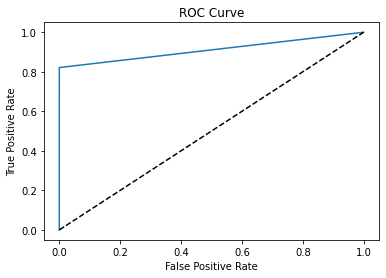

<Figure size 432x288 with 0 Axes>

In [157]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') # 대각선
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pipe_XG.predict(X_test))

0.9106791227338714

AUC의 값은 0.91로 클래스를 구별할 수 있는 확률 은 91%입니다. 따라서 모델의 성능이 훌륭하다고 할 수 있습니다.

2. 교차검증

교차검증을 하는 이유는 과적합을 피하면서 파라미터를 튜닝하고 더 신뢰성 있는 모델 평가를 진행하기 위해 교차검증을 진행하였습니다.






In [166]:
from sklearn.model_selection import cross_val_score

# 5-fold 교차검증을 수행합니다.
k = 5
scores4 = cross_val_score(pipe_XG, X_train, y_train, cv=k, 
                         scoring='accuracy')

print(f'MAE ({k} folds):', -scores4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

MAE (5 folds): [-0.99969827 -0.99953367 -0.9995611  -0.99942395 -0.99950624]
